In [80]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt

Load CSVs 

In [81]:

os.chdir('C:/Users/marce/OneDrive/Desktop/UZH/Network Science/newRpeo/UZH_Network')

study_programs = pd.read_csv("data/csv/HS24/VVZ_HS24_study_programs.csv", encoding="utf-16")
modules = pd.read_csv("data/csv/HS24/VVZ_HS24_modules.csv",encoding="utf-16")
time_schedule = pd.read_csv("data/csv/HS24/VVZ_HS24_time_schedule.csv")

Shows Headers

In [82]:
study_programs.head()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Doctoral Program Drug Discovery,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Michael Arand,Olga von Niederhäusern,Joint Doctorate at the Faculty of Science of t...
1,Doctoral Program Evolutionary Biology,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Kentaro Shimizu,Anton Weingrill,Joint Doctorate at the Faculty of Science of t...
2,Doctoral Program Mathematics,English,NaN,Faculty of Science,Benjamin Schlein,Jessica Bolsinger,Doctorate Faculty of Science
3,Major 90 Artificial Intelligence (Fast Track),English,https://www.oec.uzh.ch/en/studies/general/regu...,NaN,NaN,NaN,Master of Science UZH in Informatics (PVO08)
4,Concentration General Geography,English,NaN,Faculty of Science,NaN,NaN,Master of Science Faculty of Science (120) (2021)


In [83]:
modules.head()

,Name,Faculty,Number,Type,ECTS,Responsible instructor,Prerequisites,Prior Knowledge,Assessment,Grading Scale,Repeatability,Offer pattern,Booking Deadline/Period,Cancellation Deadline
0,BIO 780 Museum Internship,MNF,BIO780,Praktikum,4,Caroline Sonja Weckerle,This module is open for students of the Mono o...,NaN,"Final report or product, graded. In English or...","1-6, Half Grades Given",Can't be repeated,1 Semester (Every Semester),not bookable,not cancelable
1,Research Seminar: Political Communication,PHF,249-700,Module,18,Thomas Zerback,Multivariate Statistik erfolgreich absolviert,NaN,Portfolio,"1-6, Half Grades Given","repeatable once, book again",2 Semesters (Begins in Spring Semester),NaN,NaN
2,Fundamental Texts in Romance Linguistics,PHF,430-003,Module,6,Johannes Kabatek,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00
3,Fundamental Texts in French Linguistics,PHF,430-004,Module,3,Martin-Dietrich Glessgen,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00
4,Fundamental Texts in Italian Linguistics,PHF,430-005,Module,3,Michele Loporcaro,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00


In [84]:
time_schedule.head()


,Event Name,Event Code,Event Type,Instructor,Course Languages,Component of Module,Weekday,Daytime,Start Time,End Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Forschungsseminar Protein Engineering,BCH802,Forschungsseminar,Andreas Plückthun,English,NaN,Thursday,Morning,8.0,12.0
2,Research Seminar Protein Dynamics (Progress Re...,BCH805,Forschungsseminar,Benjamin Schuler,English,NaN,Monday,Afternoon,13.0,15.0
3,Research seminars,BCH405,Seminar,"Amedeo Caflisch, Raimund Dutzler, Martin Jinek...",English,BCH 405 Research seminars,Thursday,Afternoon,16.0,18.0
4,Blockcourse: Social science Research projects,44LM001,Block Course,Dorothea Lüddeckens,German,Social science Research projects,NaN,NaN,NaN,NaN


Tuesday Afternoon
Thursday Afternoon
Thursday Morning
Monday Afternoon
Monday Afternoon
0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
Number of nodes: 5
Number of edges: 4


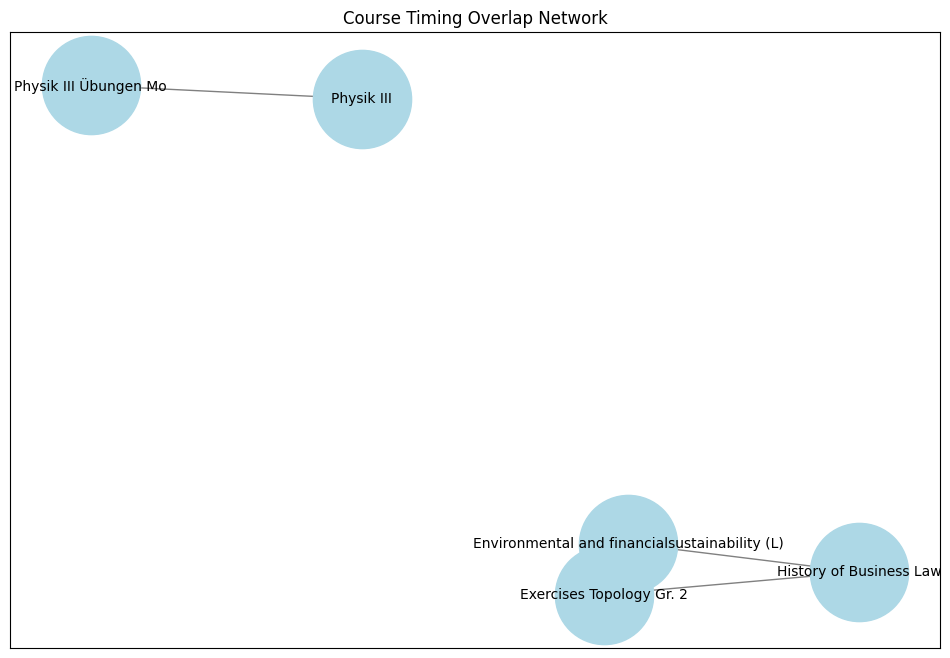

Top 5 Courses by Degree Centrality:
Environmental and financialsustainability (L): 0.50
History of Business Law: 0.50
Exercises Topology Gr. 2: 0.50
Physik III Übungen Mo: 0.25
Physik III: 0.25


In [85]:
import networkx as nx
import matplotlib.pyplot as plt

n = 10   # Set number of modules compared
# Step 1: Filter rows with NaN in 'Weekday' and 'Daytime'
filtered_df = time_schedule.dropna(subset=['Weekday', 'Daytime'])

filtered_df = filtered_df.iloc[-n:]

# Step 2: Create a graph
time_overlap_graph = nx.Graph()

# Step 3: Add nodes and edges
n_iter = 0
length_df = len(filtered_df)
nums = []
for _, row in list(filtered_df.head(5).iterrows()):
    print(row['Weekday'], row['Daytime'])

for _, course1 in filtered_df.iterrows():
    num = (int((n_iter/length_df)* 100))
    if num % 5 == 0:
        if num not in nums:
            print(num,'%')
            nums.append(num)
    n_iter += 1
        
    for _, course2 in filtered_df.iterrows():
        
        if course1['Event Code'] != course2['Event Code']:  # Avoid self-loops
            if (
                course1['Weekday'] == course2['Weekday'] and
                course1['Daytime'] == course2['Daytime']
            ):
                # Add an edge if courses overlap in time
                time_overlap_graph.add_edge(
                    course1['Event Name'],  # Use Event Name as node label
                    course2['Event Name']
                )
                

# Step 4: Display basic graph information
print(f"Number of nodes: {time_overlap_graph.number_of_nodes()}")
print(f"Number of edges: {time_overlap_graph.number_of_edges()}")

# Step 5: Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(time_overlap_graph, seed=42)  # Layout for visualization
nx.draw_networkx(
    time_overlap_graph, pos,
    with_labels=True, node_size=5000, font_size=10,
    node_color='lightblue', edge_color='gray'
)
plt.title("Course Timing Overlap Network")
plt.show()

# Step 6: Perform basic network analysis
degree_centrality = nx.degree_centrality(time_overlap_graph)
print("Top 5 Courses by Degree Centrality:")
top_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for course, centrality in top_centrality:
    print(f"{course}: {centrality:.2f}")


**Time Overlap Graph with weighted edges**


Define function for creating graph out of last N events:

In [96]:
def create_weighted_time_overlap_graph(n_events,perc = False):
    n = n_events       #Set number of modules to check
    # Helper function to calculate overlap (in minutes)
    def calculate_time_overlap(start1, end1, start2, end2):
        overlap = max(0, min(end1, end2) - max(start1, start2)) * 60  # Convert to minutes
        return overlap

    # Filter rows with valid data
    filtered_df = time_schedule.dropna(subset=['Weekday', 'Start Time', 'End Time'])

    filtered_df = filtered_df.iloc[-n:]
    # Create the graph
    time_overlap_graph = nx.Graph()

    n_iter = 0
    length_df = len(filtered_df)
    nums = []


    # Add edges with weights based on time overlap
    for _, course1 in filtered_df.iterrows():
        num = (int((n_iter/length_df)* 100))
        if num % 5 == 0:
            if num not in nums:
                if perc == True:
                    print(num,'%')
                nums.append(num)
        n_iter += 1

        for _, course2 in filtered_df.iterrows():
            if course1['Event Code'] != course2['Event Code'] and course1['Weekday'] == course2['Weekday']:
                # Calculate overlap
                overlap = calculate_time_overlap(course1['Start Time'], course1['End Time'], 
                                                course2['Start Time'], course2['End Time'])
                if overlap > 0:
                    # Add edge with overlap weight
                    time_overlap_graph.add_edge(course1['Event Name'], course2['Event Name'], weight=overlap)

    # Print graph info
    print(f"Number of nodes: {time_overlap_graph.number_of_nodes()}")
    print(f"Number of edges: {time_overlap_graph.number_of_edges()}")

    # Plot the graph with weights
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(time_overlap_graph)
    weights = nx.get_edge_attributes(time_overlap_graph, 'weight')

    nx.draw(time_overlap_graph, pos, with_labels=True, node_size=700, font_size=8, node_color='lightblue')
    nx.draw_networkx_edge_labels(time_overlap_graph, pos, edge_labels={k: f"{v:.1f} min" for k, v in weights.items()})
    plt.title("Course Timing Overlap Network (Weighted)")
    plt.show()

Number of nodes: 14
Number of edges: 16


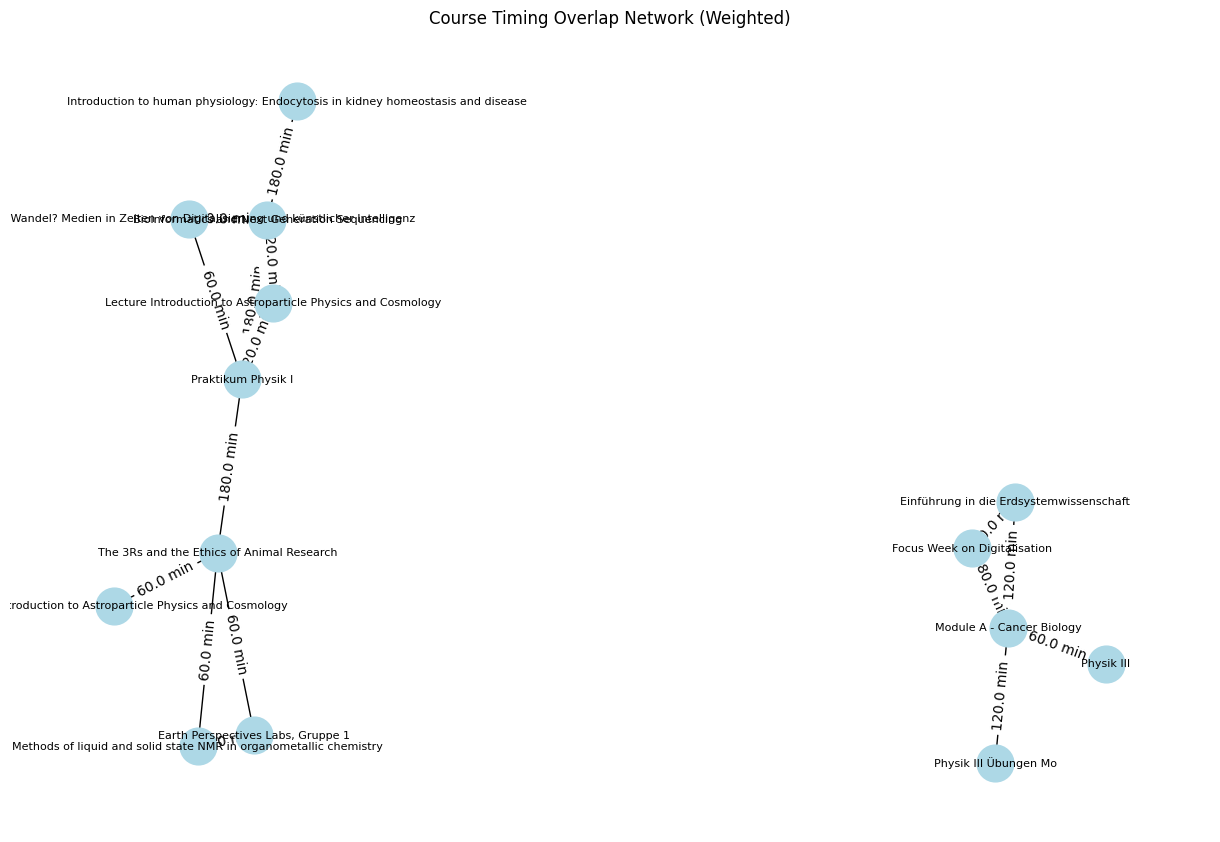

In [97]:
create_weighted_time_overlap_graph(20)  # Create small graph for visualization